This notebook demonstrates how the k-Nearest Neighbors algorithm operates on the famous Iris dataset. The goal is to evaluate the performance of kNN by varying the number of neighbors (k) and measure its accuracy

Only for learning and practicing purposes.

**What's in the notebook?**
* import the necassary libraries
* load the iris dataset
* train-test split
* defining the kNN class and writing the algorithm from scratch with the distance metrics of euclidean and manhattan
* making the prediction and evaluating accuracy for different values of k
* Visualize model performance with a confusion matrix


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x,y = data.data,data.target
X_train,X_test,y_train,y_test = train_test_split(
    x,y, test_size=0.2,random_state=42
)

In [4]:
class kNN():
    def __init__(self, k=2, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p
    
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))
    
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        

    def predict(self, X_test):
        preds = []
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours).mode

            preds.append(majority)
        return np.array(preds)

    def get_neighbours(self, test_row):
        distances = list()
        
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            distances.append((dist, train_class))
            

        distances.sort(key=lambda x: x[0])
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])
            
        return neighbours

In [5]:

for metric in ['euclidean', 'manhattan']:
    clf = kNN(k=7, metric=metric)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test, preds) * 100
    print(f'Metric: {metric}, accuracy: {accuracy:.2f}%')

Metric: euclidean, accuracy: 96.67%
Metric: manhattan, accuracy: 100.00%


<Figure size 1000x900 with 0 Axes>

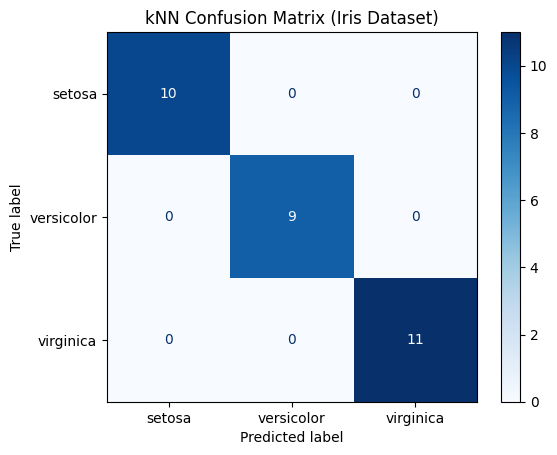

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(10,9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp = disp.plot(cmap='Blues')

plt.title('kNN Confusion Matrix (Iris Dataset)')
plt.show()